In [20]:
import numpy as np
import matplotlib.pyplot as plt
from my_env import EvidenceEnv

In [21]:
class RandomAgent(object):
    def __init__(self, env):
        """
        Args:
        env: an environment
        """
        self.env = env
        
    def act(self, observation):
        """
        Act based on observation and train agent on cumulated reward (return)
        :param
        observation: new observation
        :param
        reward: reward gained from previous action; None indicates no reward because of initial state
        :return
        : action (Variable)
        """
        return np.random.choice(self.env.n_action)
    
    def train(self, a, old_obs, r, new_obs):
        """
        :param
        a: action
        :param
        old_obs: old observation
        :param
        r: reward
        :param
        new_obs: new observation
        :return
        :
        """
        pass

In [26]:
# Number of iterations
n_iter = 1000
# environment specs
env = EvidenceEnv(n=2,p=0.95)
# define agent
agent = RandomAgent(env)
# reset environment and agent
obs = env.reset()
reward = None
done = False
R = []
for step in range(n_iter):
    env.render()
    action = agent.act(obs)
    _obs, reward, done, _ = env.step(action)
    # no training involved for random agent
    agent.train(action, obs, reward, _obs)
    obs = _obs
    R.append(reward)

1
1
0
1
0
-1
0
-1
0
1
0
1
1
1
1
1
1
-1
1
1
1
1
0
1
0
1
0
1
0
-1
1
-1
1
1
0
1
0
1
1
-1
0
1
0
1
0
-1
0
1
1
-1
1
1
1
-1
1
1
1
1
1
-1
0
-1
0
1
0
-1
0
1
1
-1
0
1
0
1
1
-1
1
1
1
1
0
-1
0
-1
0
-1
0
-1
0
-1
1
-1
0
1
1
1
1
1
0
1
0
1
1
-1
0
1
1
1
1
1
1
-1
0
1
0
-1
0
-1
1
-1
1
1
1
-1
0
-1
1
1
1
-1
1
-1
0
1
1
-1
1
-1
0
-1
1
1
0
1
1
-1
0
1
1
1
0
1
0
-1
0
1
1
-1
0
1
1
1
0
1
0
1
1
1
1
-1
0
1
0
1
0
-1
0
-1
0
-1
0
-1
1
-1
1
-1
1
1
0
-1
0
-1
0
-1
1
-1
0
-1
0
-1
0
-1
1
1
0
-1
1
1
0
-1
0
1
0
1
0
-1
1
-1
0
-1
0
1
1
-1
1
-1
0
1
1
-1
1
-1
1
-1
0
-1
0
-1
0
1
1
1
1
1
1
-1
1
1
0
-1
0
1
1
1
1
-1
1
1
0
1
1
1
0
-1
0
-1
0
-1
0
-1
0
1
0
1
0
1
0
-1
1
1
0
1
1
-1
1
-1
0
-1
1
-1
0
-1
0
-1
1
-1
0
-1
0
1
1
1
1
-1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
1
-1
1
-1
0
-1
1
1
1
-1
1
1
0
-1
0
-1
1
1
0
1
1
-1
1
-1
0
1
1
1
1
-1
1
1
0
1
0
1
1
1
0
-1
1
1
1
-1
0
-1
1
-1
1
1
1
-1
1
-1
0
-1
1
-1
1
-1
1
1
0
-1
0
-1
1
1
1
1
0
1
1
1
1
1
1
-1
0
1
0
-1
0
1
1
-1
0
-1
1
1
1
1
0
-1
1
-1
1
1
0
1
0
-1
0
-1
0
1
1
-1
1
-1
1
1
1
-1
0
1
1
1
1
1
1
1
0
-1
1
-1
0

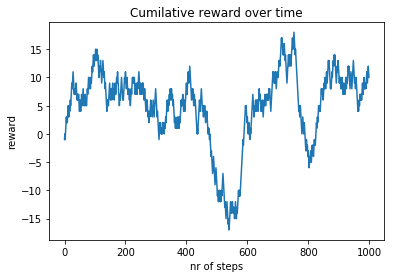

In [25]:
#visualize results for training and test loss values over the epochs
plt.xlabel('nr of steps')
plt.ylabel('reward')
timestep = range(0,np.size(R))
plt.plot(timestep,np.cumsum(R))
plt.title('Cumilative reward over time')
plt.show()